## Classifying Weather using Convolutional Neural Network

### Dataset obtained from Mendeley Data @ https://data.mendeley.com/datasets/4drtyfjtfy/1

Ajayi, Gbeminiyi (2018), “Multi-class Weather Dataset for Image Classification”, Mendeley Data, V1, doi: 10.17632/4drtyfjtfy.1

### Necessary Imports

In [1]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

import matplotlib.pyplot as plt
%matplotlib inline

import splitfolders

keras:  2.2.4-tf


Before I could create the model, I would first need to prepare the data so that it can be used. Since the dataset was unorganized at first (all of the image files were in the same folder), I would need to split them up myself. Thus, I decided to use splitfolder package to help split the file randomly at my set rato. 

In [2]:
#input_folder = "dataset"
#output = "processed_dataset"
#splitfolders.ratio(input_folder, output, seed=42, ratio=(.6, .2, .2))

## Data Loading

In [3]:
base_dir = 'C:/Users/tyd/Desktop/DeepLearning/processed_dataset/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

#setting the image size
img_size = 150 #an arbitrary number

## Building the Model

In [4]:
#I will be using 4 convolution layer to start off.

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(img_size, img_size, 3)))  #channel is 3 because RGB
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) #last layer should have 4 units because there are only 4 categories, cloudy, rain, shine, and sunrise

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
model.compile(loss='categorical_crossentropy',  #since this is a multi-class categorical problem, I wll be using cateogrical crossentropy
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])

In [7]:
batchsize=20 #an arbitrary number that was chosen

# All images will be rescaled by 1./255 (normalizing the data so that higher value does not get priority)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=batchsize,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=batchsize,
        class_mode='categorical')

Found 672 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [8]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 4)


In [9]:
stepsperepoch = train_generator.n//batchsize
validationsteps = validation_generator.n//batchsize

history = model.fit_generator(
      train_generator,
      steps_per_epoch=stepsperepoch, 
      epochs=20,
      validation_data=validation_generator,
      validation_steps=validationsteps,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 33 steps, validate for 11 steps
Epoch 1/20
33/33 - 5s - loss: 1.1499 - acc: 0.4877 - val_loss: 0.8065 - val_acc: 0.6273
Epoch 2/20
33/33 - 4s - loss: 1.1437 - acc: 0.6518 - val_loss: 0.5386 - val_acc: 0.8182
Epoch 3/20
33/33 - 4s - loss: 0.7534 - acc: 0.7500 - val_loss: 0.4183 - val_acc: 0.8455
Epoch 4/20
33/33 - 4s - loss: 0.5520 - acc: 0.7899 - val_loss: 0.3466 - val_acc: 0.8727
Epoch 5/20
33/33 - 4s - loss: 0.5669 - acc: 0.8252 - val_loss: 0.6276 - val_acc: 0.7909
Epoch 6/20
33/33 - 4s - loss: 0.4958 - acc: 0.8267 - val_loss: 0.3876 - val_acc: 0.8636
Epoch 7/20
33/33 - 4s - loss: 0.4370 - acc: 0.8436 - val_loss: 0.4245 - val_acc: 0.8636
Epoch 8/20
33/33 - 4s - loss: 0.4014 - acc: 0.8681 - val_loss: 0.5325 - val_acc: 0.8500
Epoch 9/20
33/33 - 4s - loss: 0.3959 - acc: 0.8681 - val_loss: 0.2960 - val_acc: 0.8909
Epoch 10/20
33/33 - 4s - loss: 0.3094 - 

## Visualizing the results

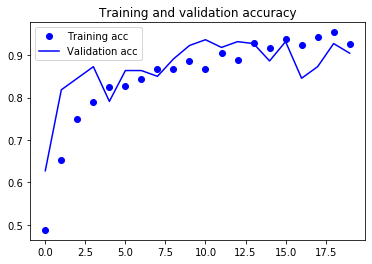

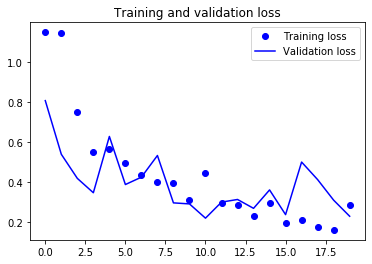

In [10]:
# Plot the Training and Validation Accuracy & Loss Scores
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
# Save the Model
model.save('weather1_model.h5')

## Evaluate model using Testing images

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=20, class_mode='categorical')

Found 229 images belonging to 4 classes.


In [13]:
model.load_weights('weather_model.h5')
#model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-3),
              metrics=['acc'])
history = model.fit(test_generator, epochs=20, verbose=2)


  ...
    to  
  ['...']
Train for 12 steps
Epoch 1/20
12/12 - 2s - loss: 1.1953 - acc: 0.8079
Epoch 2/20
12/12 - 1s - loss: 0.3288 - acc: 0.9214
Epoch 3/20
12/12 - 1s - loss: 0.1789 - acc: 0.9389
Epoch 4/20
12/12 - 1s - loss: 0.2575 - acc: 0.9432
Epoch 5/20
12/12 - 1s - loss: 0.2001 - acc: 0.9345
Epoch 6/20
12/12 - 1s - loss: 0.2200 - acc: 0.9301
Epoch 7/20
12/12 - 1s - loss: 0.0796 - acc: 0.9782
Epoch 8/20
12/12 - 1s - loss: 0.0114 - acc: 0.9956
Epoch 9/20
12/12 - 1s - loss: 0.0246 - acc: 0.9956
Epoch 10/20
12/12 - 1s - loss: 0.0023 - acc: 1.0000
Epoch 11/20
12/12 - 1s - loss: 2.6319 - acc: 0.9301
Epoch 12/20
12/12 - 1s - loss: 0.1683 - acc: 0.9389
Epoch 13/20
12/12 - 1s - loss: 0.0630 - acc: 0.9956
Epoch 14/20
12/12 - 1s - loss: 0.0022 - acc: 1.0000
Epoch 15/20
12/12 - 1s - loss: 0.0010 - acc: 1.0000
Epoch 16/20
12/12 - 1s - loss: 4.3817e-04 - acc: 1.0000
Epoch 17/20
12/12 - 1s - loss: 1.9828e-04 - acc: 1.0000
Epoch 18/20
12/12 - 1s - loss: 8.6232e-05 - acc: 1.0000
Epoch 19/20
12/12

## Using the model to make prediction

In [14]:
weather_list = ['cloudy', 'rain', 'shine', 'sunrise']

In [15]:
# Define some related functions for image process and model prediction

def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

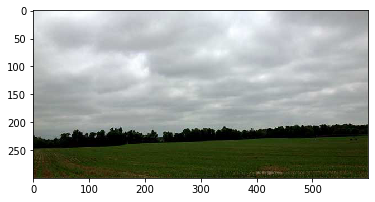

The prediction is:  cloudy 

    cloudy          rain         shine       sunrise
0     1.0  2.393960e-09  7.464575e-14  1.265307e-12


In [16]:
img = 'C:/Users/tyd/Desktop/DeepLearning/cloudy.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, weather_list)
print('The prediction is: ', result, '\n\n', prob_df)

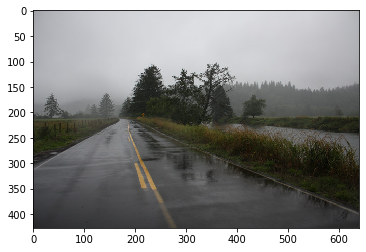

The prediction is:  rain 

      cloudy      rain         shine       sunrise
0  0.002171  0.997829  2.829486e-11  4.320730e-13


In [17]:
img = 'C:/Users/tyd/Desktop/DeepLearning/rain.jpg'
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, weather_list)
print('The prediction is: ', result, '\n\n', prob_df)

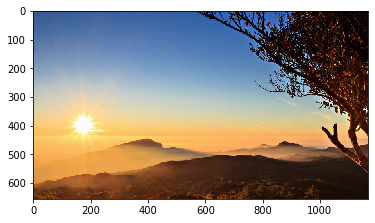

The prediction is:  sunrise 

          cloudy          rain         shine  sunrise
0  5.383263e-14  2.586267e-20  9.296913e-16      1.0


In [18]:
img = 'C:/Users/tyd/Desktop/DeepLearning/sunrise.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, weather_list)
print('The prediction is: ', result, '\n\n', prob_df)

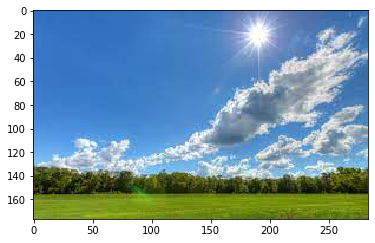

The prediction is:  shine 

          cloudy          rain  shine       sunrise
0  2.633730e-07  1.074716e-09    1.0  1.236786e-08


In [19]:
img = 'C:/Users/tyd/Desktop/DeepLearning/shine.jpg' 
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, weather_list)
print('The prediction is: ', result, '\n\n', prob_df)